In [1]:
##更改路徑
import os
print (os.getcwd())
os.chdir("/Users/irenetsai/opt/finlab_ml_course")

/Users/irenetsai/opt/Medium DS


## Part 1 -- 臺股大盤數據作資料處理

In [2]:
##讀取大盤資料
from finlab.data import Data
data = Data()
twii = data.get("發行量加權股價指數")
twii = twii['台股指數'] #取出Series即可
twii.head()

/Users/irenetsai/opt/anaconda3/envs/finlab/lib/python3.7/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


date
2006-01-02 09:00:00    6548.34
2006-01-02 09:01:00    6457.61
2006-01-02 09:02:00    6452.82
2006-01-02 09:03:00    6452.39
2006-01-02 09:04:00    6451.61
Name: 台股指數, dtype: float64

In [3]:
## 取出收盤價
twii = twii[twii.index.hour == 13]
twii = twii[twii.index.minute == 30]
twii = twii[:-5] #取到9月底資料就好
twii

date
2006-01-02 13:30:00     6462.06
2006-01-03 13:30:00     6591.77
2006-01-04 13:30:00     6616.44
2006-01-05 13:30:00     6709.87
2006-01-06 13:30:00     6694.82
                         ...   
2022-09-26 13:30:00    13778.19
2022-09-27 13:30:00    13826.59
2022-09-28 13:30:00    13466.07
2022-09-29 13:30:00    13534.26
2022-09-30 13:30:00    13424.58
Name: 台股指數, Length: 4131, dtype: float64

<AxesSubplot:xlabel='date'>

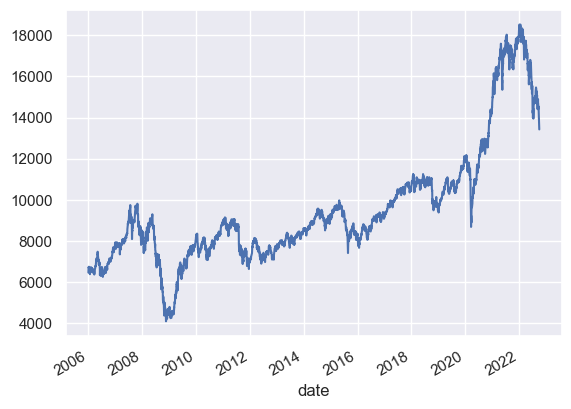

In [4]:
##畫出大盤走勢
%matplotlib inline
import seaborn as sns
sns.set()
twii.plot()

In [5]:
##每月報酬率轉換成表格形式
start_price = twii.groupby([twii.index.year, twii.index.month]).first() #每月開盤價
last_price = twii.groupby([twii.index.year, twii.index.month]).last() #每月收盤價
profit = ((last_price/start_price)*100-100).round(2)
profit

date  date
2006  1        1.09
      2       -0.50
      3        0.01
      4        7.67
      5       -4.90
              ...  
2022  5        1.87
      6      -11.09
      7        4.58
      8        0.76
      9       -9.30
Name: 台股指數, Length: 201, dtype: float64

In [6]:
##轉置年份與月份
profit.index = profit.index.set_names(["year", "month"], level=[0,1])
profit = profit.reset_index()
profit = profit.pivot("year", "month")
profit

台股指數                                                              \
month    1     2      3      4     5      6     7      8      9      10   
year                                                                      
2006   1.09 -0.50   0.01   7.67 -4.90  -2.45 -3.93   2.64   3.48   0.87   
2007  -2.79  2.60   2.68  -0.12  3.06   7.68  3.89   1.02   5.53   2.35   
2008  -9.63  9.63   3.75   5.94 -3.84 -13.77 -5.18   0.62 -16.05 -15.50   
2009  -9.59  6.98  17.74  12.76  8.85  -7.51  7.58  -3.27   6.97  -2.72   
2010  -6.91 -1.18   4.52  -0.11 -7.27   0.55  6.98  -3.73   7.43   0.52   
2011   1.33 -5.62  -0.51   3.48  0.48  -4.52 -1.09 -11.03  -6.86   8.18   
2012   8.13  7.58  -2.28  -4.59 -4.89   2.68 -1.02   1.78   3.55  -6.64   
2013   0.91  0.53  -0.58   2.46  1.55  -1.69  0.90  -0.43   1.68   3.21   
2014  -1.74  4.54   2.87  -0.92  2.35   2.96 -1.34   1.83  -5.74  -0.17   
2015   0.95  2.50  -0.16   3.29 -1.46  -3.14 -7.57  -4.10   2.04   3.11   
2016   0.38  3.12   3.05  -3.23  2.91   0.81  2.82  -0.13   1.84   0.61   
2017   1.89  3.41   1.41  -0.78  1.00   3.05  0.14   1.42  -1.99   3.14   
2018   3.67 -3.09   1.24  -2.12  2.41  -1.02  2.59  -0.31   0.38 -11.31   
2019   3.96  3.85   2.81   3.05 -4.60   2.20 -0.66  -1.06   1.83   3.57   
2020  -5.00 -0.55 -13.09  13.75  2.07   4.89  8.21   0.63  -1.48  -0.02   
2021   1.59  3.53   3.04   6.01 -0.89   3.46 -2.63  -0.07  -3.09   2.51   
2022  -3.26 -1.39  -1.14  -5.86  1.87 -11.09  4.58   0.76  -9.30    NaN   

                    
month     11    12  
year                
2006    7.89  2.76  
2007  -10.54 -0.90  
2008  -10.70  1.61  
2009    3.37  7.04  
2010   -0.09  5.31  
2011   -9.42 -1.49  
2012    5.58  1.31  
2013    0.22  2.34  
2014    2.02  2.08  
2015   -3.41 -1.48  
2016   -0.34 -0.11  
2017   -2.28  0.40  
2018    0.44 -4.05  
2019    0.79  4.30  
2020    8.99  6.10  
2021    2.11  3.60  
2022     NaN   NaN

Text(92.25, 0.5, 'year')

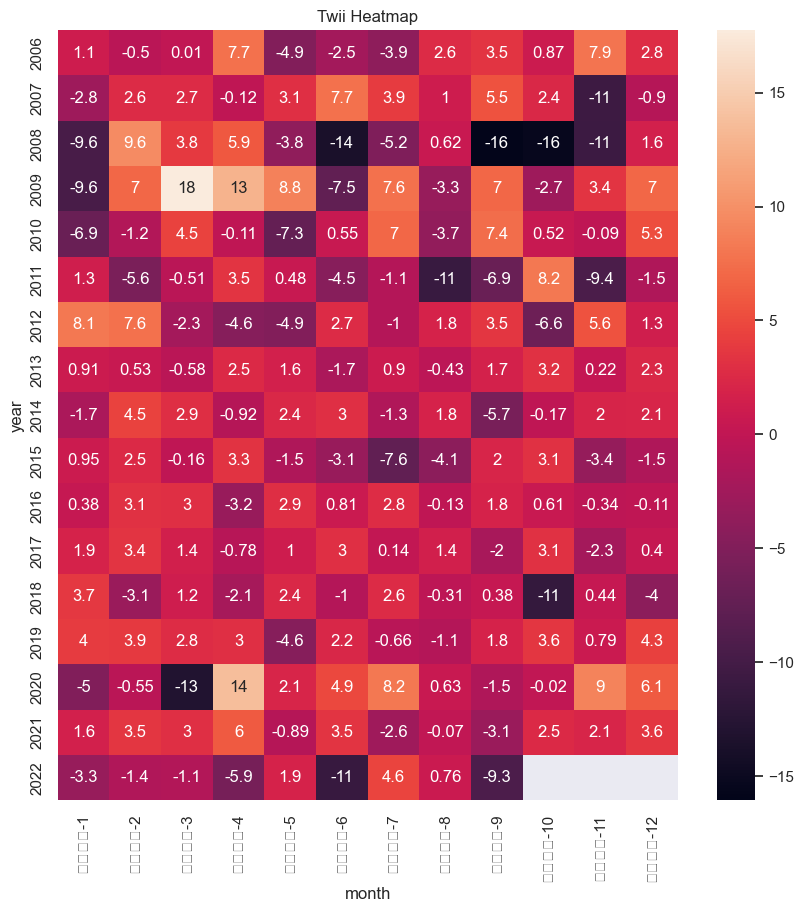

In [12]:
##畫出色溫圖
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)

sns.heatmap(profit, annot=True);

plt.title('Twii Heatmap')
plt.xlabel('month')
plt.ylabel('year')

## Part 2 -- 臺股乖離率跟60天報酬的關係(季均線)

In [8]:
import pandas as pd
    
sma = twii.rolling(60).mean()           ##"days"幾天均線
bias = twii / sma                         ##乖離率 
twii_profit = twii.shift(-60) / twii    ##後"days"日漲跌 
df = pd.DataFrame({                       ##將資料合併（方便之後做圖）
    'price': twii,
    'sma': sma,
    'bias': bias,
    'profit': twii_profit,
    'year': twii.index.year,
})
df = df.dropna(how='any')                 ##刪除NaN
df

,price,sma,bias,profit,year
date,,,,,
2006-04-04 13:30:00,6665.60,6570.783000,1.014430,1.005822,2006
2006-04-06 13:30:00,6760.82,6575.762333,1.028142,0.993740,2006
2006-04-07 13:30:00,6781.94,6578.931833,1.030857,0.993006,2006
2006-04-10 13:30:00,6780.64,6581.668500,1.030231,0.982202,2006
2006-04-11 13:30:00,6757.17,6582.456833,1.026542,0.985482,2006
...,...,...,...,...,...
2022-07-01 13:30:00,14343.08,16264.617833,0.881858,0.960616,2022
2022-07-04 13:30:00,14217.06,16215.258333,0.876770,0.972535,2022
2022-07-05 13:30:00,14349.20,16166.336000,0.887598,0.938454,2022


<AxesSubplot:xlabel='bias', ylabel='profit'>

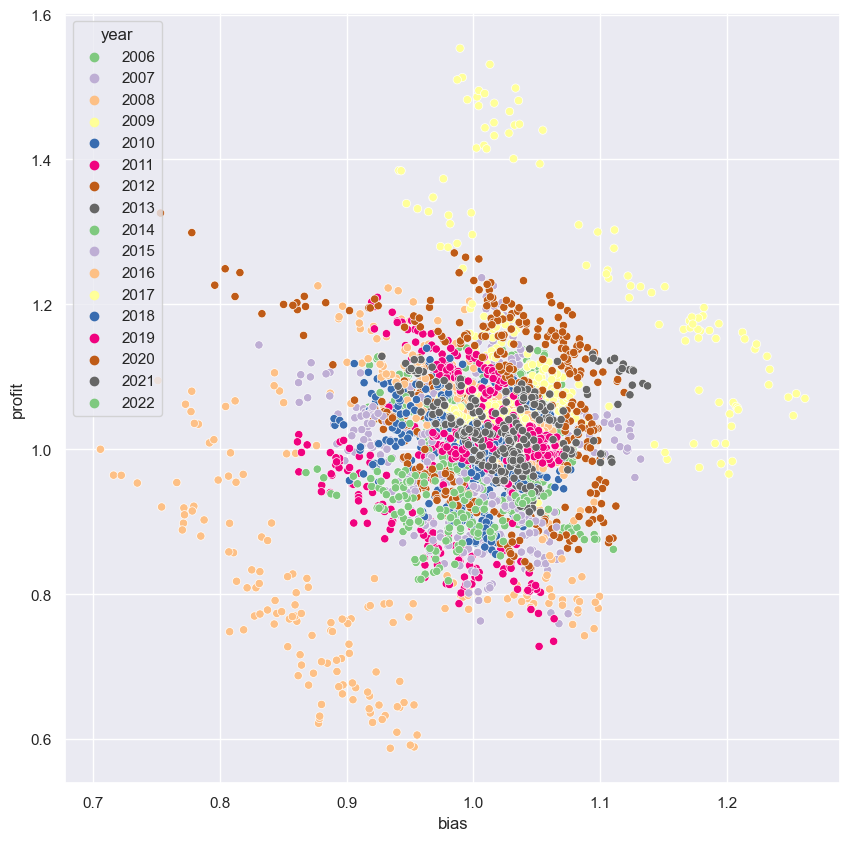

In [9]:
##乖離率做圖
sns.scatterplot(x="bias", y="profit", data=df, hue="year", palette="Accent", legend="full")

In [10]:
##查看現在的乖離率
bias.tail()

date
2022-09-26 13:30:00    0.932806
2022-09-27 13:30:00    0.936496
2022-09-28 13:30:00    0.912987
2022-09-29 13:30:00    0.918079
2022-09-30 13:30:00    0.911578
Name: 台股指數, dtype: float64